In [1]:
import pandas as pd

df = pd.read_excel("Data/riket2023_åk9_np.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grundskolan - Resultat nationella prov årskurs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Engelska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Valt läsår: 2022/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Antal elever med provbetyg A-F,NaN,NaN,Andel (%) med provbetyg A-E,NaN,NaN,Genomsnittlig betygspoäng,NaN,NaN
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
9,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4


In [16]:

sheet_names = pd.ExcelFile("Data/riket2023_åk9_np.xlsx").sheet_names

print(sheet_names[:-1])
df_dict = dict()

for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel("Data/riket2023_åk9_np.xlsx", skiprows=8, sheet_name=sheet_name)

df_dict["Matematik"]

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']


,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [3]:
subjects = df_dict.keys()
subjects

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

# b.

In [4]:
import numpy as np

postfixes = (
    [""] * 2 + ["_A_F_antal"] * 3 + ["_A_E_andel"] * 3 + ["_genomsnitt_betyg"] * 3
)

for subject in subjects:
    new_columns = df_dict[subject].columns.str.strip() + np.array(postfixes)
    df_dict[subject].columns = new_columns
    df_dict[subject] = df_dict[subject].rename({"Typ av huvudman": "Huvudman"}, axis=1)

df_dict["Svenska som andraspråk"]

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


# c.

In [5]:
df_dict["Matematik"].head()

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [ ]:
df_dict["Matematik"].info()

In [ ]:
df_dict["Matematik"]["Totalt_A_F_antal"]

In [ ]:
df_dict["Matematik"].describe().transpose()

# d.

In [9]:
df_dict["Matematik"].head()

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [10]:
import duckdb

df_math = df_dict["Matematik"]

total_students = (
    duckdb.query(
        f"""
            SELECT totalt_a_f_antal
            FROM df_math
            WHERE huvudman = 'Samtliga'
             """
    )
    .df()
    .values[0][0]
)

students_passed = (
    df_math.query("Huvudman == 'Samtliga'")["Totalt_A_E_andel"] * 0.01 * total_students
)
total_students - students_passed

0    11637.494
Name: Totalt_A_E_andel, dtype: object

# e.

In [11]:
total_points = {}

for subject in subjects:
    total_points[subject] = df_dict[subject].query("Huvudman == 'Samtliga'")["Totalt_genomsnitt_betyg"].values[0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

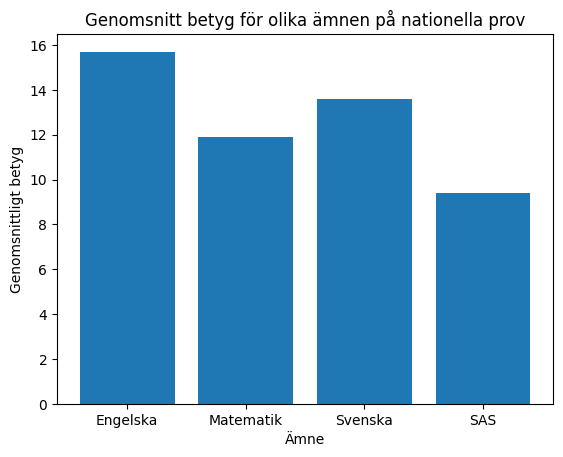

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(total_points.keys(), total_points.values())
ax.set(
    xlabel="Ämne",
    ylabel="Genomsnittligt betyg",
    title="Genomsnitt betyg för olika ämnen på nationella prov",
)

subjects = list(subjects)
subjects[-1] = "SAS"
ax.set_xticks(labels = subjects, ticks = range(len(subjects)));